<a href="https://colab.research.google.com/github/NITINRAJAYADAV/Diwali-sales-analysis/blob/main/Electricpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your Excel file
file_path = 'Assignment_Data_ElectricPe.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
print(df)


                                  StationID                  Station_Name  \
0      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
1      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
2      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
3      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
4      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
...                                     ...                           ...   
22525  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22526  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22527  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22528  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22529  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   

      Station_Type Station_Category Station_Access              ChargerID  

In [27]:
import pandas as pd

# Assuming your DataFrame is named df

# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with missing values in specific columns (replace 'column_name' with actual column names)
columns_with_missing_values = ['hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22', 'hour23']
df = df.dropna(subset=columns_with_missing_values)

# Convert 'Ping_Date' to datetime format
df['Ping_Date'] = pd.to_datetime(df['Ping_Date'])

# Fill missing values in numerical columns with 0
numerical_columns = df.columns[df.dtypes == 'float64']
df[numerical_columns] = df[numerical_columns].fillna(0)

# Convert 'Ping_Date' to date only (remove timestamp)
df['Ping_Date'] = df['Ping_Date'].dt.date

# If you want to keep only specific columns, you can select them
# For example, keep only 'StationID', 'Station_Name', 'Ping_Date', and numerical columns
selected_columns = ['StationID', 'Station_Name', 'Ping_Date'] + list(numerical_columns)
df = df[selected_columns]

# Display the cleaned DataFrame
print(df)


                                  StationID                  Station_Name  \
0      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
1      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
2      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
3      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
4      0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
...                                     ...                           ...   
22524  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22525  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22526  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22527  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   
22528  ff8f7b91-a421-4dbe-8b96-c662fe2ab30b             PARIMALA SUNRIDGE   

        Ping_Date  hour17  hour18  hour19  hour20  hour21  hour22  hour23  

In [33]:
# Check if the columns 'hour0' to 'hour23' exist in the DataFrame
hour_columns = ['hour{}'.format(i) for i in range(24)]
if set(hour_columns).issubset(df.columns):
    # Calculate uptime for each charger across days and hours
    df['Total_Uptime'] = df[hour_columns].sum(axis=1)

    # Melt the DataFrame to create a 'Uptime' column
    df_melted = pd.melt(df, id_vars=['Ping_Date', 'Total_Uptime'],
                        value_vars=hour_columns,
                        var_name='Hour', value_name='Uptime')

    # Convert 'Ping_Date' to date only (remove timestamp)
    df_melted['Ping_Date'] = pd.to_datetime(df_melted['Ping_Date']).dt.date

    # Plot uptime across days
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Ping_Date', hue='Uptime', data=df_melted)
    plt.title('Uptime Across Days')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Plot uptime across hours
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Hour', hue='Uptime', data=df_melted)
    plt.title('Uptime Across Hours')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'hour0' to 'hour23' not found in the DataFrame.")

Columns 'hour0' to 'hour23' not found in the DataFrame.


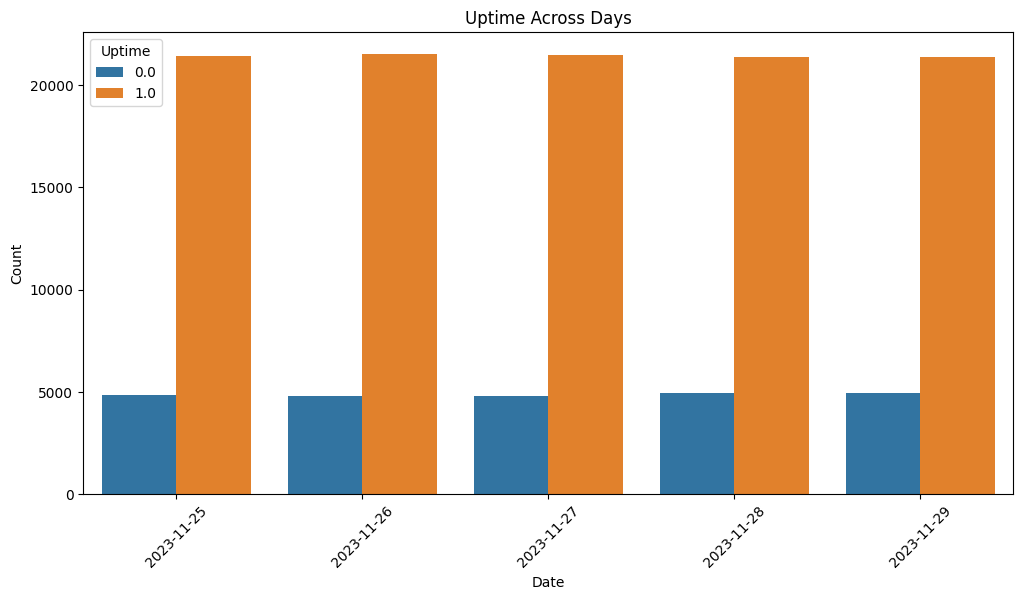

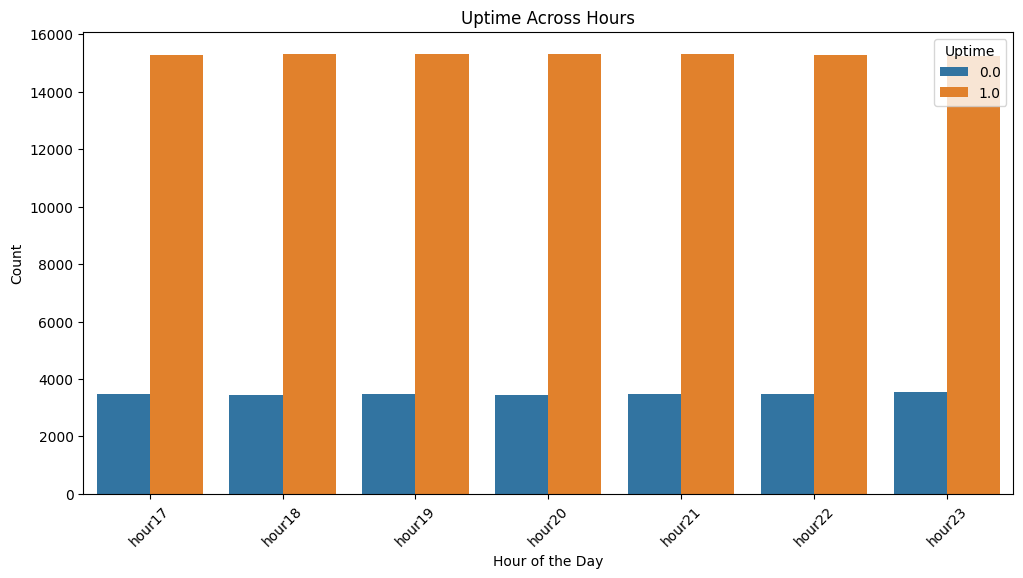

In [34]:
hour_columns = [col for col in df.columns if 'hour' in col]

if hour_columns:
    # Calculate uptime for each charger across days and hours
    df['Total_Uptime'] = df[hour_columns].sum(axis=1)

    # Melt the DataFrame to create a 'Uptime' column
    df_melted = pd.melt(df, id_vars=['Ping_Date', 'Total_Uptime'],
                        value_vars=hour_columns,
                        var_name='Hour', value_name='Uptime')

    # Convert 'Ping_Date' to date only (remove timestamp)
    df_melted['Ping_Date'] = pd.to_datetime(df_melted['Ping_Date']).dt.date

    # Plot uptime across days
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Ping_Date', hue='Uptime', data=df_melted)
    plt.title('Uptime Across Days')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Plot uptime across hours
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Hour', hue='Uptime', data=df_melted)
    plt.title('Uptime Across Hours')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No columns with 'hour' in the name found in the DataFrame.")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


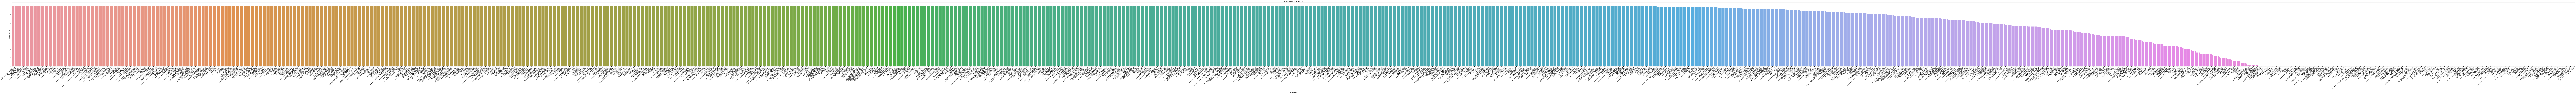

In [40]:
station_uptime = df.groupby('Station_Name')['Total_Uptime'].mean().sort_values(ascending=False)

# Visualize the results using a bar plot
plt.figure(figsize=(400, 10))
sns.barplot(x=station_uptime.index, y=station_uptime.values)
plt.title('Average Uptime by Station')
plt.xlabel('Station Name')
plt.ylabel('Average Uptime')
plt.xticks(rotation=45, ha='right')
plt.show()

In [53]:
import seaborn as sns
from scipy.stats import pointbiserialr

In [55]:
import pandas as pd
import seaborn as sns
from scipy.stats import pointbiserialr

# Assuming your DataFrame is named df

# Check if the columns exist before applying pd.get_dummies
if 'Station_Type' in df.columns and 'IsOperational' in df.columns:
    # Encode categorical variables as binary
    df['Station_Type_Encoded'] = pd.get_dummies(df['Station_Type'], drop_first=True)

    # Calculate point-biserial correlation coefficients
    correlation_type = pointbiserialr(df['Station_Type_Encoded'], df['IsOperational'])

    # Print correlation coefficients
    print(f"Correlation with Station Type: {correlation_type.correlation:.2f}, p-value: {correlation_type.pvalue:.4f}")

    # Visualize the results using a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Station_Type', y='IsOperational', data=df)
    plt.title('Operational Status by Station Type')
    plt.show()

else:
    print("The specified columns are not present in the DataFrame.")


The specified columns are not present in the DataFrame.


In [56]:
print(df.columns)

Index(['StationID', 'Station_Name', 'Ping_Date', 'hour17', 'hour18', 'hour19',
       'hour20', 'hour21', 'hour22', 'hour23', 'Total_Uptime'],
      dtype='object')


In [57]:
import pandas as pd
import seaborn as sns
from scipy.stats import pointbiserialr

# Assuming your DataFrame is named df

# Check if the columns exist before applying pd.get_dummies
if 'Station_Type' in df.columns and 'Total_Uptime' in df.columns:
    # Encode categorical variables as binary
    df['Station_Type_Encoded'] = pd.get_dummies(df['Station_Type'], drop_first=True)

    # Calculate point-biserial correlation coefficients
    correlation_type = pointbiserialr(df['Station_Type_Encoded'], df['Total_Uptime'])

    # Print correlation coefficients
    print(f"Correlation with Station Type: {correlation_type.correlation:.2f}, p-value: {correlation_type.pvalue:.4f}")

    # Visualize the results using a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Station_Type', y='Total_Uptime', data=df)
    plt.title('Uptime by Station Type')
    plt.show()

else:
    print("The specified columns are not present in the DataFrame.")

The specified columns are not present in the DataFrame.


In [61]:
print(df.columns)

Index(['StationID', 'Station_Name', 'Ping_Date', 'hour17', 'hour18', 'hour19',
       'hour20', 'hour21', 'hour22', 'hour23', 'Total_Uptime'],
      dtype='object')


In [68]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


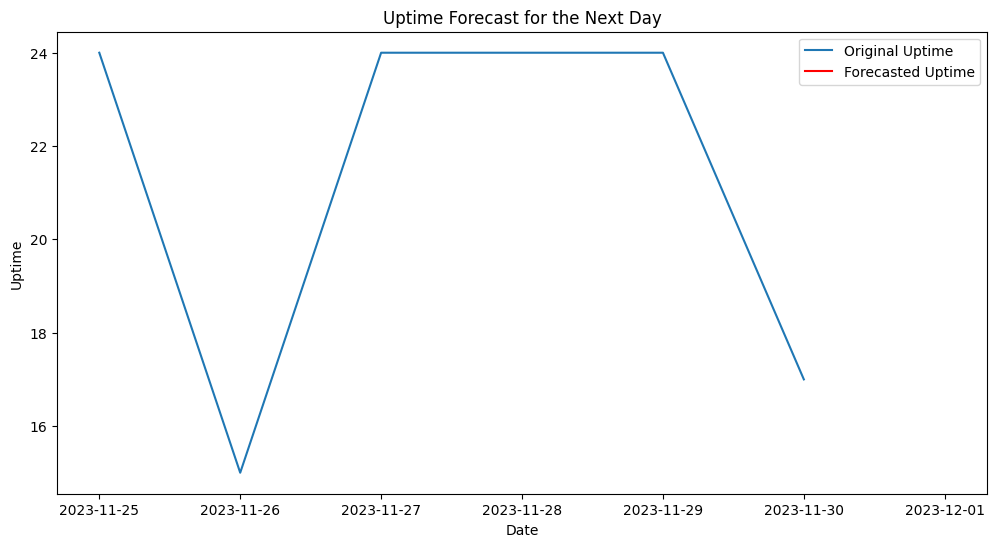

In [69]:
selected_charger = 'WA000822LAC1S009464-1'
selected_station_data = df[df['ChargerID'] == selected_charger]

# Extract relevant columns for time series analysis
time_series_data = selected_station_data[['Ping_Date', 'hour0', 'hour1', 'hour2', 'hour3', 'hour4', 'hour5',
                                          'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12',
                                          'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18', 'hour19',
                                          'hour20', 'hour21', 'hour22', 'hour23']]

# Melt the DataFrame to create a time series with 'Ping_Date' and 'Hour' as columns
time_series_data_melted = pd.melt(time_series_data, id_vars=['Ping_Date'],
                                  value_vars=['hour{}'.format(i) for i in range(24)],
                                  var_name='Hour', value_name='Uptime')

# Convert 'Ping_Date' to datetime format
time_series_data_melted['Ping_Date'] = pd.to_datetime(time_series_data_melted['Ping_Date'])

# Set 'Ping_Date' as the index
time_series_data_melted.set_index('Ping_Date', inplace=True)

# Resample the time series data to daily frequency, summing the hourly uptimes
daily_data = time_series_data_melted.resample('D').sum()

# Fit ARIMA model
model = ARIMA(daily_data['Uptime'], order=(5, 1, 0))  # Example order, you may need to tune this
results = model.fit()

# Forecast future uptimes
forecast_steps = 1  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted values
forecasted_values = forecast.predicted_mean

# Plot original data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Uptime'], label='Original Uptime')
plt.plot(forecasted_values.index, forecasted_values.values, color='red', label='Forecasted Uptime')
plt.title('Uptime Forecast for the Next Day')
plt.xlabel('Date')
plt.ylabel('Uptime')
plt.legend()
plt.show()

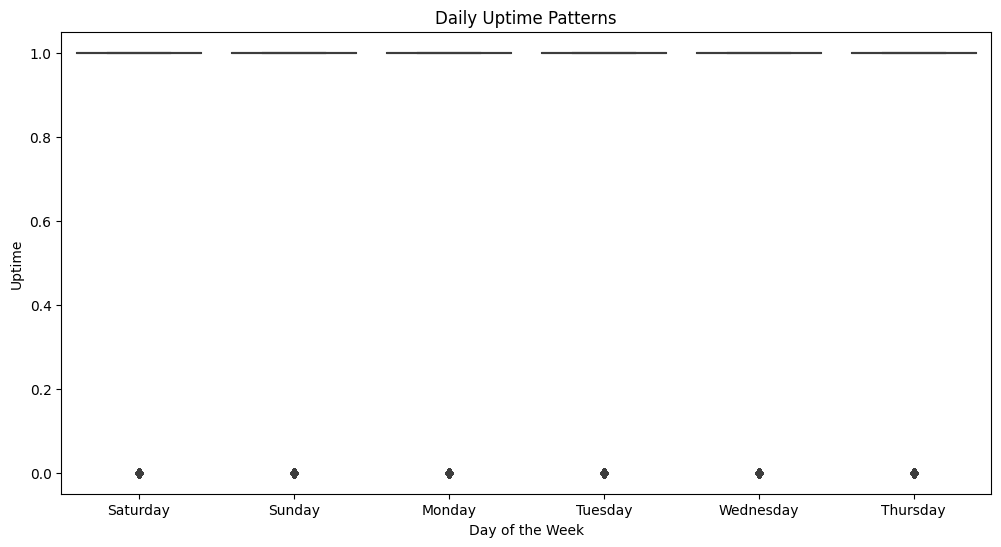

In [71]:
uptime_data = df[['Ping_Date', 'hour0', 'hour1', 'hour2', 'hour3', 'hour4', 'hour5',
                   'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12',
                   'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18', 'hour19',
                   'hour20', 'hour21', 'hour22', 'hour23']]

# Melt the DataFrame to create a 'Uptime' column
uptime_data_melted = pd.melt(uptime_data, id_vars=['Ping_Date'],
                             value_vars=['hour{}'.format(i) for i in range(24)],
                             var_name='Hour', value_name='Uptime')

# Convert 'Ping_Date' to datetime format
uptime_data_melted['Ping_Date'] = pd.to_datetime(uptime_data_melted['Ping_Date'])

# Extract day of the week
uptime_data_melted['Day_of_Week'] = uptime_data_melted['Ping_Date'].dt.day_name()

# Plot daily uptime patterns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_Week', y='Uptime', data=uptime_data_melted)
plt.title('Daily Uptime Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Uptime')
plt.show()